In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
pip install bottleneck --upgrade

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv("C:\\datasets\\Time series data\\AirPassengers.csv")
df

,Month,Passengers
0,15-01-1949,112
1,15-02-1949,118
2,15-03-1949,132
3,15-04-1949,129
4,15-05-1949,121
...,...,...
139,15-08-1960,606
140,15-09-1960,508
141,15-10-1960,461
142,15-11-1960,390


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df= df.set_index('Month')
df.head

<bound method NDFrame.head of             Passengers
Month                 
15-01-1949         112
15-02-1949         118
15-03-1949         132
15-04-1949         129
15-05-1949         121
...                ...
15-08-1960         606
15-09-1960         508
15-10-1960         461
15-11-1960         390
15-12-1960         432

[144 rows x 1 columns]>

# visualize the time series

check for trend,seasonality or random patterns

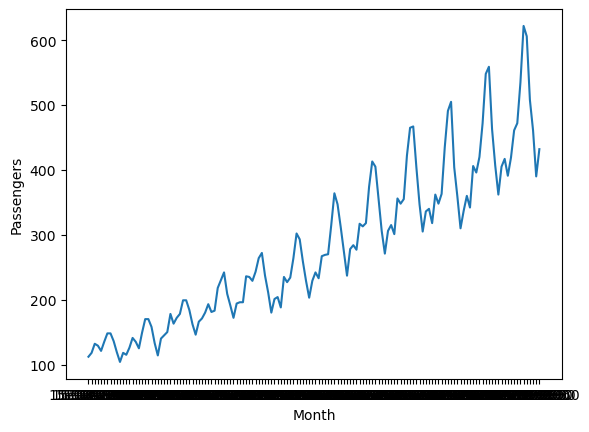

In [6]:
sns.lineplot(x=df.index,y=df["Passengers"])
plt.show()

# check for stationarity

**Method-1: Rolling Statistics**

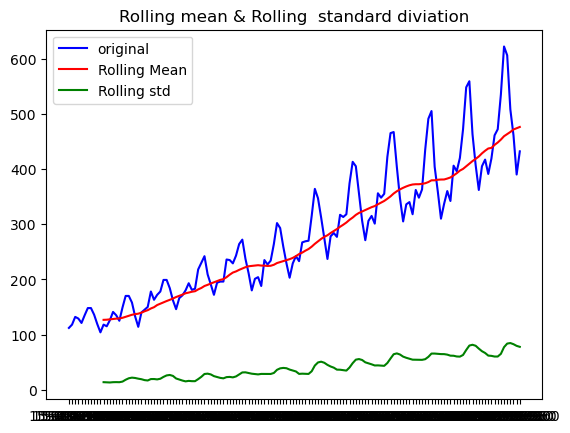

In [7]:
# determing rolling statistics

rolmean = df["Passengers"].rolling(window=12).mean()
rolstd = df["Passengers"].rolling(window=12).std()

#plot rolling statistics

orig = plt.plot(df["Passengers"],color= 'blue',label='original')
mean = plt.plot(rolmean,color='red',label='Rolling Mean')
std= plt.plot(rolstd,color='green',label ='Rolling std')

plt.title("Rolling mean & Rolling  standard diviation")
plt.xticks(ticks=df.index)
plt.legend()
plt.show()

# **Method - 2 : Augmented Dicky Fuller Test (ADF Test)**
    
    -> for the ADF test
       *HO: data is non-stationary
        *H1: data is stationary
            
    ->Based on p value , we will accept or reject H0(if p-value <5% reject null hypothesis)

In [8]:
from statsmodels.tsa.stattools import adfuller
adfuller_result = adfuller(df["Passengers"])
adfuller_result

(0.8153688792060547,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [9]:
print('p-value',adfuller_result[1])

p-value 0.9918802434376411


**The Time Series is non-stationary**

# Now, we have to convert the non-stationary data to stationary data

**Applying Diffrencing** 

In [10]:
diff= df['Passengers']-df['Passengers'].shift(2)

diff.dropna(inplace=True)

#check whether the data is stationary or not after applying differencing
adfuller_result = adfuller(diff)
print('p-value of adf Test :', adfuller_result[1])

p-value of adf Test : 0.03862975767698775


**Now, the series is stationary**

# Train-Test-Split

**split the data into train(80%)&test(20%)

-> for time series data, we have use first 80% of records for training &next 20% of records for testing

-> here 80% = 0.8*142= 114 records, so first 114 records we have to use tsaining


**NOTE: We should not apply train-test split function, because it divides the data randomly**

In [11]:
y_train= diff[:114]
y_test = diff[114:]

# Build ARIMA Model


**ARIMA Model is build by using p,d,q values**

-> p is AR value (determined from PACF plot)
-> d is integration
-> q is MA value (determined from ACF plot)

**Plot ACF/PACF and find p & q parameters**

-> **Auto correlation Function(ACF)**- A function which gives us values of auto-correlation of any series.


-> **Partial Auto Correlation Function(PACF)**- an indirect function to find auto correlation after removing the relationship explained by previous lags

**Time series lag example**

-> Original time series = {21,22,21,20,19}
-> lagged time series by 1 lag = {22,21,20,19}
-> lag 1 correlation will be correlation between {21,22,21,20} and {22,21,20,19}


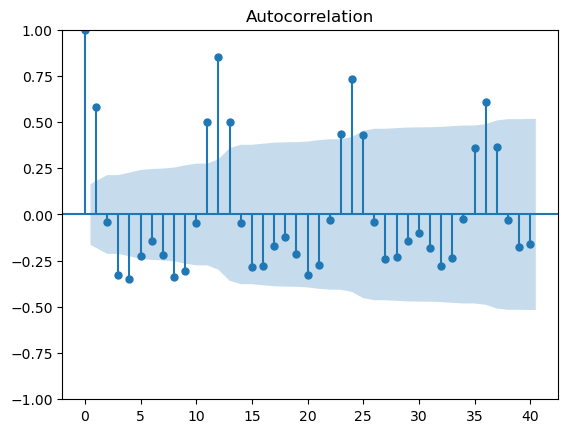

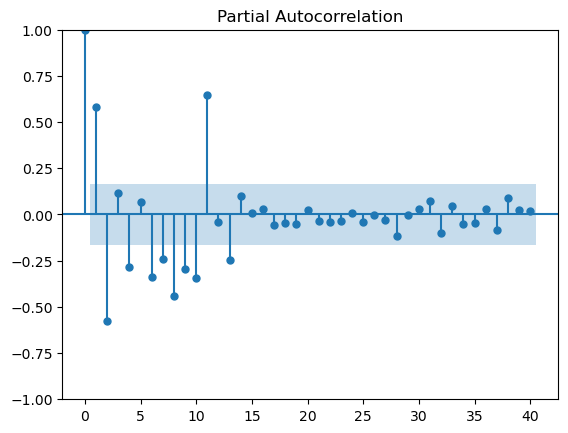

In [12]:
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.api as sm
fig = sm.graphics.tsa.plot_acf(diff,lags=40)
fig = sm.graphics.tsa.plot_pacf(diff,lags=40)

# ARIMA 

**ARIMA Model is build by using p,d,q values**

-> p is AR value (determinned ffrom PACF Plot)


-> d is intergration


-> q is MA value( determined from ACF plot)


In [13]:
# Modelling

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(diff,order=(11,0,12))
ARIMA = model.fit()

# predictions

ypred_test = ARIMA.predict(start= y_test.index[0],end= y_test.index[-1])
ypred_train= ARIMA.predict(start= y_train.index[0],end=y_train.index[-1])

# Evalution

from sklearn.metrics import r2_score
print("Train R2 of ARIMA MODEL:",r2_score(ypred_train,y_train))
print("Test R2 of ARIMA model :",r2_score(ypred_test,y_test))

C:\Users\bhask\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\bhask\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\bhask\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\bhask\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Train R2 of ARIMA MODEL: 0.9381790081151107
Test R2 of ARIMA model : 0.9658009073380179



# Build SARIMAX mODEL

**whenever, there is seasonality in given data, apply SARIMAX**

**SARIMAX Model is build by using p,d,q,s values**

-> p is AR value (determinned from PACF Plot)


-> d is intergration


-> q is MA value( determined from ACF plot)

-> s is seasonality value

In [14]:
# Modelling 

from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(diff,seasonal_order=(11,0,12,12))
SARIMAX = model.fit()

# predictions

ypred_train = SARIMAX.predict(start= y_train.index[0],end= y_train.index[-1])
ypred_test = SARIMAX.predict(start= y_test.index[0],end=y_test.index[-1])

# evalution

from sklearn.metrics import r2_score
print("Train R2 of SARIMAX model :",r2_score(ypred_train,y_train))
print("Test R2 of SARIMAX model :", r2_score(ypred_test,y_test))

C:\Users\bhask\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\bhask\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\bhask\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Train R2 of SARIMAX model : 0.8960607155858467
Test R2 of SARIMAX model : 0.9486169159281259
